In [83]:
import sys
sys.path.append("..")

# Reload modules in /src/ when changed
%load_ext autoreload
%autoreload 2

from fxml.data.normalize_data import categorize_column

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# plt.rcParams["figure.figsize"] = (12, 2)
import seaborn as sns
sns.set(style="ticks", palette="tab10")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [84]:
df = pd.read_pickle('../data/processed/USDJPY-15m-20210101-20241231_FEATURES.pkl')

In [95]:
df.columns.to_list()

['open',
 'high',
 'low',
 'close',
 'volume',
 'spread',
 'tick',
 'close_pct_return',
 'close_return',
 'close_log_return',
 'close_fd_return',
 'close_log_fd_return',
 'EMA_5',
 'EMA_5_slope',
 'EMA_9',
 'EMA_9_slope',
 'EMA_20',
 'EMA_20_slope',
 'EMA_24',
 'EMA_24_slope',
 'EMA_36',
 'EMA_36_slope',
 'EMA_50',
 'EMA_50_slope',
 'EMA_100',
 'EMA_100_slope',
 'ATRr_14',
 'ATRr_60',
 'ATRr_120',
 'ADX_14',
 'ADXR_14_2',
 'DMP_14',
 'DMN_14',
 'RSI_14',
 'RSI_25',
 'RSI_50',
 'BBL_5_2.0_2.0',
 'BBM_5_2.0_2.0',
 'BBU_5_2.0_2.0',
 'BBB_5_2.0_2.0',
 'BBP_5_2.0_2.0',
 'BBL_10_2.0_2.0',
 'BBM_10_2.0_2.0',
 'BBU_10_2.0_2.0',
 'BBB_10_2.0_2.0',
 'BBP_10_2.0_2.0',
 'BBL_15_2.0_2.0',
 'BBM_15_2.0_2.0',
 'BBU_15_2.0_2.0',
 'BBB_15_2.0_2.0',
 'BBP_15_2.0_2.0',
 'BBL_20_2.0_2.0',
 'BBM_20_2.0_2.0',
 'BBU_20_2.0_2.0',
 'BBB_20_2.0_2.0',
 'BBP_20_2.0_2.0',
 'MACD_8_17_9',
 'MACDh_8_17_9',
 'MACDs_8_17_9',
 'MACD_12_26_9',
 'MACDh_12_26_9',
 'MACDs_12_26_9',
 'unix_time',
 'minute',
 'hour',
 'dow',

Found 70 numeric features.


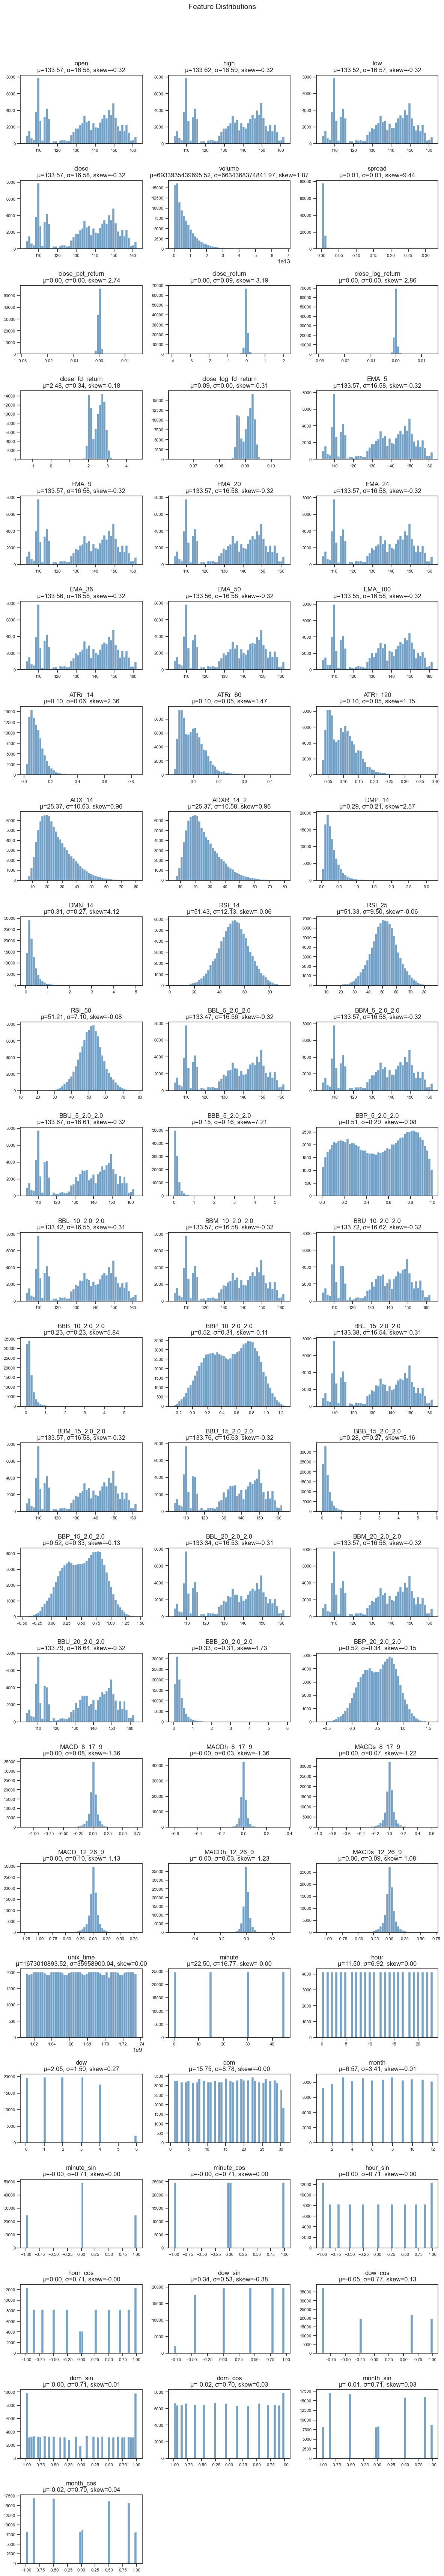

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

# 假設 df 是你的 DataFrame
# df = pd.read_pickle("your_feature_df.pkl")

# 選出數值型特徵
num_cols = df_features.select_dtypes(include=[np.number]).columns
print(f"Found {len(num_cols)} numeric features.")

# --- 可調整參數 ---
n_cols = 3  # 每列顯示幾張圖
n_rows = ceil(len(num_cols) / n_cols)
bins = 50

# --- 建立 subplot grid ---
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*2.8))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    # print(col)
    s = df_features[col].replace([np.inf, -np.inf], np.nan).dropna()
    ax = axes[i]
    sns.histplot(s, bins=bins, color="steelblue", ax=ax)
    ax.set_title(f"{col}\nμ={s.mean():.2f}, σ={s.std():.2f}, skew={s.skew():.2f}")
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)

# 移除多餘的 subplot（若 feature 不足）
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Feature Distributions", fontsize=14, y=1.02)
plt.show()


In [87]:
def categorize_column(col_name: str) -> str:
    regex_mapping = {
        "robust": [r"(volume)", r"(tick)"],
        "standard": [
            r"(spread)" r"(log_return)",
            r"(ema|_slope)",
            r"(bbb_|dc|macd)",
        ],
        "minmax": [
            r"\b(open|high|low|close)\b",
            r"(atr)",
            r"(adx|plus_di|minus_di)",
            r"(rsi)",
        ],
    }
    """Return which scaler a given column should use."""
    for scaler_type, patterns in regex_mapping.items():
        if any(re.search(pattern, col_name, re.I) for pattern in patterns):
            return scaler_type
    return "none"

In [88]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

cols_by_scaler = {"robust": [], "standard": [], "minmax": [], "none": []}
for col in numeric_cols:
    scaler_type = categorize_column(col)
    cols_by_scaler[scaler_type].append(col)

cols_by_scaler

{'robust': ['volume', 'tick'],
 'standard': ['EMA_5',
  'EMA_5_slope',
  'EMA_9',
  'EMA_9_slope',
  'EMA_20',
  'EMA_20_slope',
  'EMA_24',
  'EMA_24_slope',
  'EMA_36',
  'EMA_36_slope',
  'EMA_50',
  'EMA_50_slope',
  'EMA_100',
  'EMA_100_slope',
  'BBB_5_2.0_2.0',
  'BBB_10_2.0_2.0',
  'BBB_15_2.0_2.0',
  'BBB_20_2.0_2.0',
  'MACD_8_17_9',
  'MACDh_8_17_9',
  'MACDs_8_17_9',
  'MACD_12_26_9',
  'MACDh_12_26_9',
  'MACDs_12_26_9'],
 'minmax': ['open',
  'high',
  'low',
  'close',
  'ATRr_14',
  'ATRr_60',
  'ATRr_120',
  'ADX_14',
  'ADXR_14_2',
  'RSI_14',
  'RSI_25',
  'RSI_50'],
 'none': ['spread',
  'close_pct_return',
  'close_return',
  'close_log_return',
  'close_fd_return',
  'close_log_fd_return',
  'DMP_14',
  'DMN_14',
  'BBL_5_2.0_2.0',
  'BBM_5_2.0_2.0',
  'BBU_5_2.0_2.0',
  'BBP_5_2.0_2.0',
  'BBL_10_2.0_2.0',
  'BBM_10_2.0_2.0',
  'BBU_10_2.0_2.0',
  'BBP_10_2.0_2.0',
  'BBL_15_2.0_2.0',
  'BBM_15_2.0_2.0',
  'BBU_15_2.0_2.0',
  'BBP_15_2.0_2.0',
  'BBL_20_2.0_2.0'

In [89]:
scalers = {
    "robust": RobustScaler(),
    "standard": StandardScaler(),
    "minmax": MinMaxScaler(),
}


In [ ]:
train_df = pd.read_pickle('../data/processed/USDJPY-15m-20210101-20231231_FEATURES.pkl')
test_df = pd.read_pickle('../data/processed/USDJPY-15m-20240101-20241231_FEATURES.pkl')

for scaler_type, columns in cols_by_scaler.items():
    if columns and scaler_type != "none":
        scaler = scalers[scaler_type]
        train_df[columns] = scaler.fit_transform(train_df[columns])
        test_df[columns] = scaler.transform(test_df[columns])

        # Save scaler if directory provided
        scaler_path = (
            Path("../data/processed/scalers")
            / f"{scaler_type}_scaler.pkl"
        )
        joblib.dump(scaler, scaler_path)
        print(f"    → Saved {scaler_type} scaler to: {scaler_path}")


In [94]:
for scaler_type, columns in cols_by_scaler.items():
    if columns and scaler_type != "none":
        scaler = scalers[scaler_type]
        

        # Save scaler if directory provided
        scaler_path = (
            Path("../data/processed/scalers")
            / f"{scaler_type}_scaler.pkl"
        )
        joblib.dump(scaler, scaler_path)
        print(f"    → Saved {scaler_type} scaler to: {scaler_path}")


    → Saved robust scaler to: ../data/processed/scalers/robust_scaler.pkl
    → Saved standard scaler to: ../data/processed/scalers/standard_scaler.pkl
    → Saved minmax scaler to: ../data/processed/scalers/minmax_scaler.pkl
